## Temporal distribution

In [1]:
#import libraries

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
noise_complaints_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/noise_data_clean.csv')
#noise_complaints_data=pd.read_csv('noise_data_clean.csv')

In [4]:
noise_complaints_data.head()

,Unnamed: 0,Unnamed: 0.1,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Descriptor,Complaint_Type,Resolution_Description,Resolution_Action_UpdatedDate,zipcode,Borough,Latitude,Longitude,Location,Processing_Time
0,0,0,52494258,2021-11-12 23:32:03,2021-11-13 00:01:47,NYPD,New York City Police Department,Loud Music/Party,Noise - Street/Sidewalk,The Police Department responded to the complai...,11/13/2021 12:01:53 AM,10009,MANHATTAN,40.728098,-73.980986,"(40.72809840521916, -73.98098598390919)",0 days 00:29:44
1,1,1,52494267,2021-11-12 22:51:56,2021-11-13 02:07:21,NYPD,New York City Police Department,Loud Music/Party,Noise - Residential,The Police Department responded to the complai...,11/13/2021 02:07:28 AM,11385,QUEENS,40.703420,-73.910624,"(40.70342006960225, -73.91062391218271)",0 days 03:15:25
2,2,2,52494269,2021-11-12 21:52:21,2021-11-12 22:46:15,NYPD,New York City Police Department,Loud Music/Party,Noise - Street/Sidewalk,The Police Department responded to the complai...,11/12/2021 10:46:20 PM,10012,MANHATTAN,40.727491,-74.002594,"(40.727490610002285, -74.00259410868611)",0 days 00:53:54
3,3,3,52762434,2021-12-10 23:07:33,2021-12-10 23:16:17,NYPD,New York City Police Department,Banging/Pounding,Noise - Residential,The Police Department reviewed your complaint ...,12/10/2021 11:16:21 PM,10456,BRONX,40.838195,-73.911184,"(40.83819547525466, -73.91118371113687)",0 days 00:08:44
4,4,4,52762435,2021-12-10 10:33:53,2021-12-10 12:20:28,NYPD,New York City Police Department,Banging/Pounding,Noise - Residential,The Police Department responded to the complai...,12/10/2021 12:20:34 PM,11228,BROOKLYN,40.625777,-74.010364,"(40.62577708307177, -74.01036422375117)",0 days 01:46:35




### pre-process
In this section, we will explore to see if there are patterns in the volume of noise complaints by hour, day of the week, and by month.

However, we must first prepare our date/time data to fit our needs

In [5]:
#check the current created date format
type(noise_complaints_data['Created_Date'].iloc[0])

str

In [6]:
#convert created date to date time format
noise_complaints_data['Created_Date'] = pd.to_datetime(noise_complaints_data['Created_Date'])
#convert created date to date time format
noise_complaints_data['Closed_Date'] = pd.to_datetime(noise_complaints_data['Closed_Date'])

In [7]:
#create hour, month, day of week columns
noise_complaints_data['Hour'] = noise_complaints_data['Created_Date'].apply(lambda time: time.hour)
noise_complaints_data['Month'] = noise_complaints_data['Created_Date'].apply(lambda time: time.month)
noise_complaints_data['Day of Week'] = noise_complaints_data['Created_Date'].apply(lambda time: time.dayofweek)

In [8]:
#check format of the day of the week column
noise_complaints_data['Day of Week'].head()

0    4
1    4
2    4
3    4
4    4
Name: Day of Week, dtype: int64

The day of the week column is currently set as integer values (0 = Monday, 1 = Tuesday,... 6 = Sunday)

This is completely fine but we'll convert this to string values that we are more familar to seeing

In [9]:
#convert day of the week from integer to string descriptions
d_o_w = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
noise_complaints_data['Day of Week'] = noise_complaints_data['Day of Week'].map(d_o_w)

### By Hour

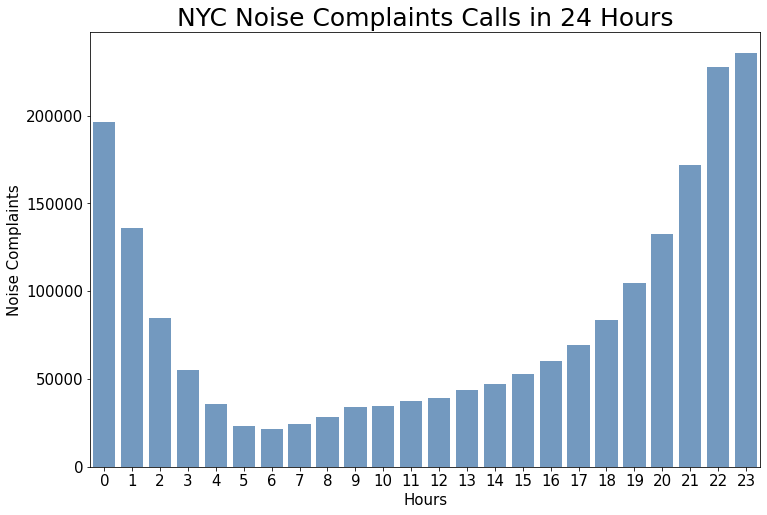

In [10]:
#plot count of complaints by time

#resize plot
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.countplot(x=noise_complaints_data['Hour'],color='#6699CC')

plt.ylabel("Noise Complaints", fontsize=15)
plt.xlabel("Hours", fontsize=15)
plt.title('NYC Noise Complaints Calls in 24 Hours',fontsize=25)

plt.savefig('./Pic hours',dpi=500,bbox_inches = 'tight',transparent = True)

The complaints are counted by military hour. It makes sense that a large volume of these complaints were reported at night time (with high spikes around midnight)

### By Day of Week

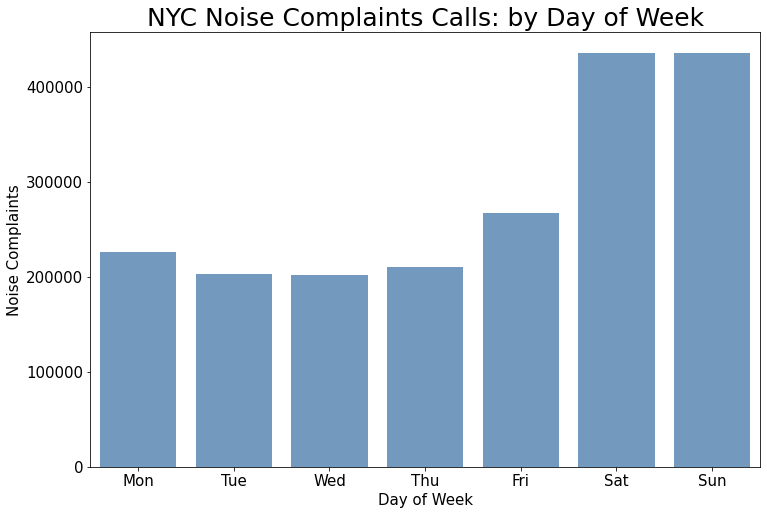

In [11]:
#plot count of complaints by day of week
rcParams['figure.figsize'] = 12, 8

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.countplot(x=noise_complaints_data['Day of Week'],color='#6699CC',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.ylabel("Noise Complaints", fontsize=15)
plt.xlabel("Day of Week", fontsize=15)
plt.title('NYC Noise Complaints Calls: by Day of Week',fontsize=25)

plt.savefig('./Pic week',dpi=500,bbox_inches = 'tight',transparent = True)

From this visualization, we may infer that higher volume of complaints are recorded during weekends compared to weekdays.

### By Month

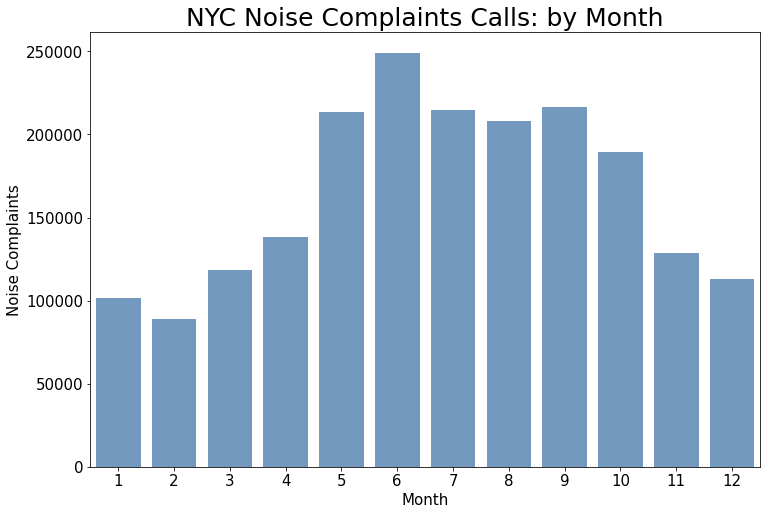

In [12]:
#plot count of complaints by month
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.countplot(x=noise_complaints_data['Month'],color='#6699CC')
plt.ylabel("Noise Complaints", fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.title('NYC Noise Complaints Calls: by Month',fontsize=25)

plt.savefig('./Pic month',dpi=500,bbox_inches = 'tight',transparent = True)

a potential seasonal trend when it comes to noise complaints in NYC. Summer months such as May, June, July have high records of complaints.

winter months such as November, December, January, and February have lower counts compared to other months.

Meanwhile, fall months such as September and October were also very hot for noise complaints

### By Date

In [13]:
noise_complaints_data['Date'] = noise_complaints_data['Created_Date'].apply(lambda t:t.date())

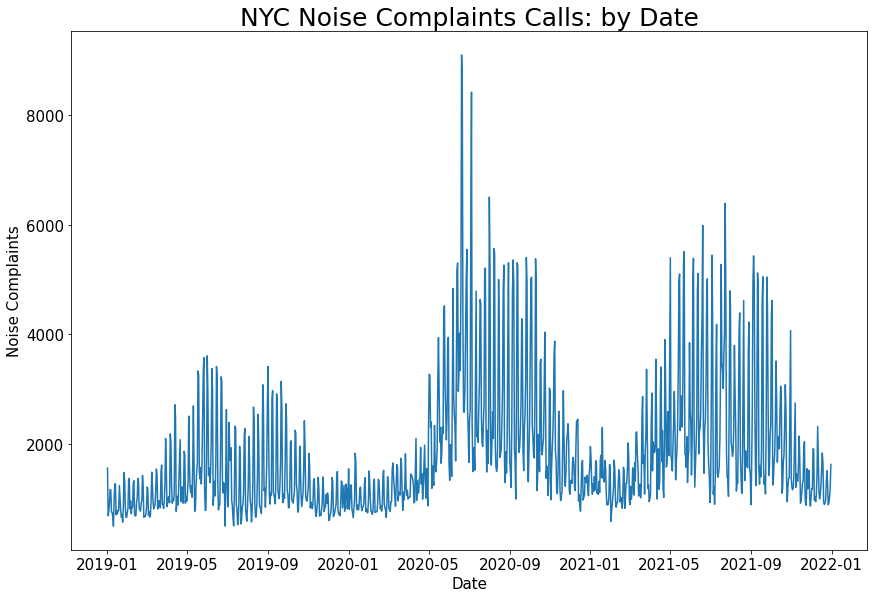

In [14]:
noise_complaints_data.groupby(noise_complaints_data['Date']).count()['Unique_Key'].plot()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.ylabel("Noise Complaints", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.title('NYC Noise Complaints Calls: by Date',fontsize=25)

plt.savefig('./Pic Date',dpi=500,bbox_inches = 'tight',transparent = True)

This visualization replicates information from the previous plot but with a time series-like presentation.

Multiple factors that we have already looked at (seasonality, time of day, weekend/weekday) may have impacted the up and down spikes.

### Date/Time Relationships
Here we will explore relationships between our date/time variables for count of noise complaints

In [ ]:
from pandas.core.dtypes.dtypes import CategoricalDtype
#create data frame of count of complaints on day of week vs hour
dayHour = noise_complaints_data.groupby(by=['Day of Week','Hour']).count()['Unique_Key'].unstack()


#dayHour.reset_index()
newIndex =['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
dayHour=dayHour.reindex(newIndex)
dayHour


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Mon,25550,15751,9485,6137,3959,2986,2827,3448,3703,4420,...,5789,6208,7030,8303,9935,12447,14896,18785,23698,21522
Tue,16247,10448,6282,3997,2962,2055,2664,3507,3746,4216,...,5632,6420,7321,8007,9308,11845,14498,18825,23572,22051
Wed,16628,10087,6080,3987,2803,2095,2873,3552,3809,4343,...,5204,6165,7342,8030,9886,11715,14632,18251,23400,22203
Thu,16357,10259,6407,3902,2879,2229,2772,3352,3674,4251,...,5767,6551,7081,7767,9402,11793,15206,19677,25801,25474
Fri,20075,12678,7775,5045,3529,2641,3022,3473,3521,4363,...,5782,6853,7447,8974,11491,15118,19681,26270,36874,43189
Sat,39389,28528,18218,11957,7730,4760,3416,3769,5651,6722,...,9417,10476,12250,14399,17170,21541,28512,38633,56627,66761
Sun,62152,48083,30722,19812,11759,6639,4184,3547,4267,5646,...,9661,10240,12028,13904,16636,19924,24984,31219,37642,34626


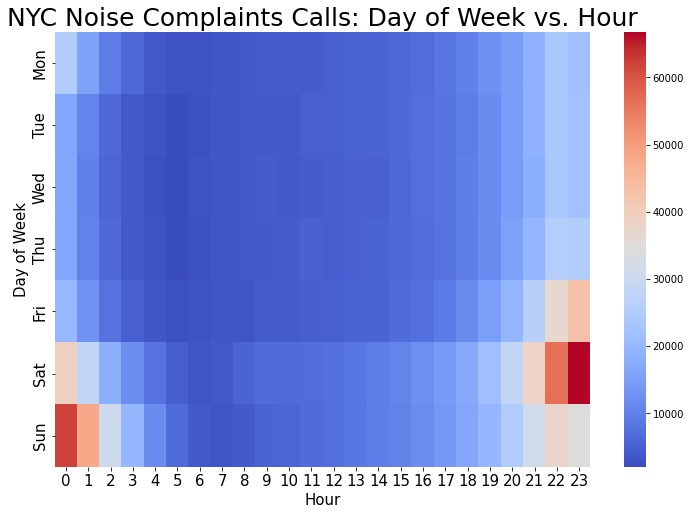

In [ ]:
#create heatmap of count of complaints on day of week vs hour
rcParams['figure.figsize'] = 12, 8

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Day of week", fontsize=15)
plt.xlabel("Hour", fontsize=15)


sns.heatmap(data=dayHour,cmap='coolwarm')
plt.title('NYC Noise Complaints Calls: Day of Week vs. Hour',fontsize=25)

plt.savefig('./Pic heatmap1',dpi=500,bbox_inches = 'tight',transparent = True)

We already noted that large volume of complaints were recorded during weekends and night time and this heatmap confirms just that.

It also seems that lower number of noise complaints were recorded during weekday business hours

In [ ]:
#create data frame of count of complaints on month vs hour
monthDay = noise_complaints_data.groupby(by=['Day of Week','Month']).count()['Unique_Key'].unstack()
newIndex =['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
monthDay=monthDay.reindex(newIndex)
monthDay

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Mon,11064,9915,14378,15153,28638,27719,24938,22541,27905,16403,15257,12385
Tue,13162,9935,15220,18332,21456,25689,18256,17679,18847,17413,13959,13341
Wed,12703,10072,13016,17348,20616,25635,20221,15960,20137,18539,13243,14242
Thu,12336,10399,13635,15905,21825,22958,23534,18465,18722,21195,15241,15684
Fri,14845,12185,17485,17313,29827,30578,28703,25875,26340,28558,18707,16885
Sat,19151,19279,23077,27464,44182,55908,47973,55119,51036,46305,26126,19957
Sun,18136,16965,21850,26978,47097,60743,50789,52260,53729,41031,26334,20229


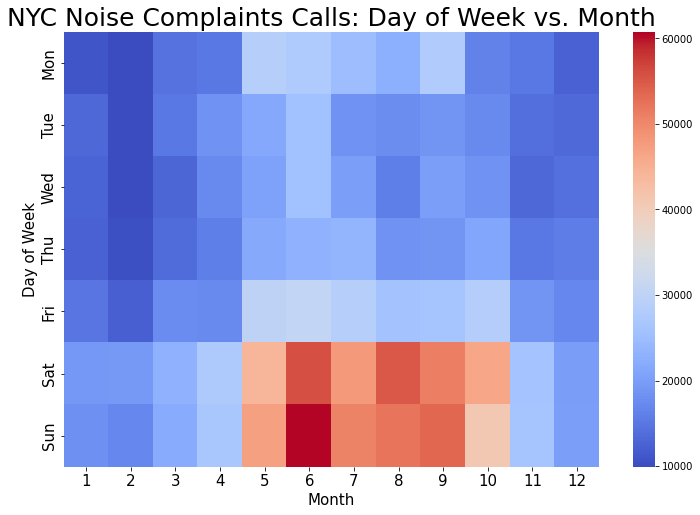

In [ ]:
#create heatmap of count of complaints on month vs hour
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Day of week", fontsize=15)
plt.xlabel("Month", fontsize=15)
sns.heatmap(data=monthDay,cmap='coolwarm')
plt.title('NYC Noise Complaints Calls: Day of Week vs. Month',fontsize=25)

plt.savefig('./Pic heatmap2',dpi=500,bbox_inches = 'tight',transparent = True)

Here we see a possible combination of seasonality and weekday/weekend being factors.

Weekends during Spring, Summer, and Fall months recorded more complaints than other times.

## Plot map

In [ ]:
#find maximum and minimum longitude
print(noise_complaints_data['Longitude'].max())
print(noise_complaints_data['Longitude'].min())

-73.70071894190423
-74.25484510366583


In [ ]:
#find maximum and minimum latitude
print(noise_complaints_data['Latitude'].max())
print(noise_complaints_data['Latitude'].min())

40.91345653278351
40.49930937185741


Text(0.5, 1.0, 'NYC Noise Complaints from 2019 to 2021')

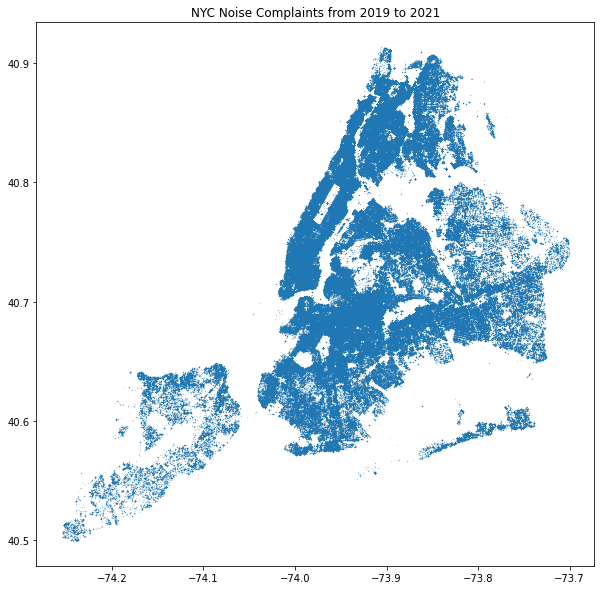

In [ ]:
#plot complaints

#resize plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

plt.plot(noise_complaints_data['Longitude'],noise_complaints_data['Latitude'],'.',markersize=0.2)
plt.title('NYC Noise Complaints from 2019 to 2021')

Each point in this plot is a reported noise complaint. Darker spots of the plot indicate high volume of complaints. We can almost see a visible map of New York City with Manhattan and Brooklyn having the most defined outline.

Let's take a closer look at the top 4 boroughs

Text(0.5, 1.0, 'Queens Noise Complaints from 2019 to 2021')

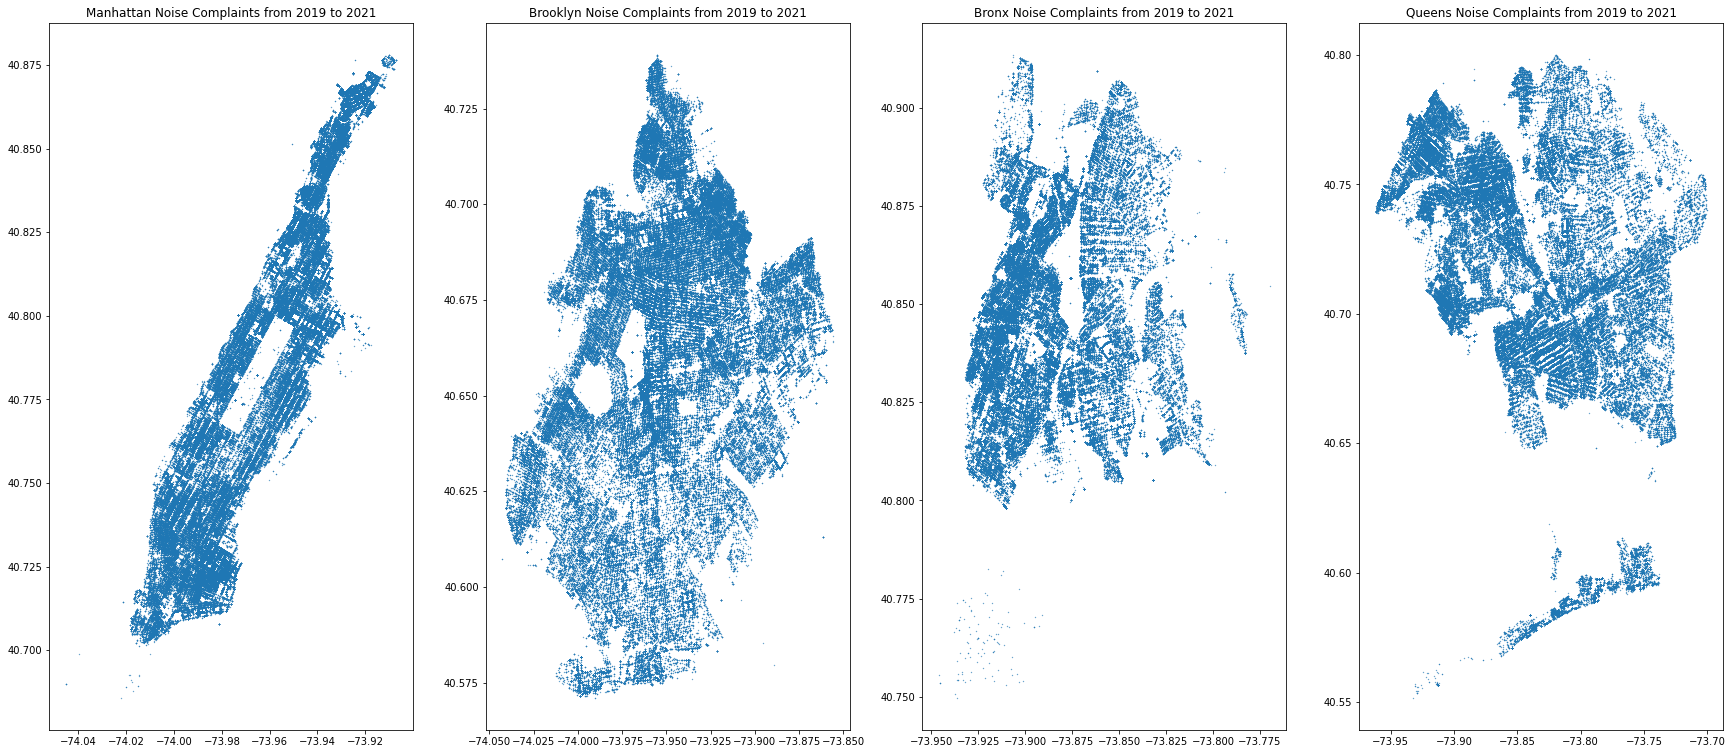

In [ ]:
#closer look at Manhattan, Brooklyn, Bronx, Queens

#resize plot
from pylab import rcParams
rcParams['figure.figsize'] = 30, 13

#create subplot 
fig, axes = plt.subplots(nrows=1,ncols=4)

#filter boroughs
noise_complaints_manhattan= noise_complaints_data[noise_complaints_data['Borough']=='MANHATTAN']
noise_complaints_brooklyn= noise_complaints_data[noise_complaints_data['Borough']=='BROOKLYN']
noise_complaints_bronx= noise_complaints_data[noise_complaints_data['Borough']=='BRONX']
noise_complaints_queens= noise_complaints_data[noise_complaints_data['Borough']=='QUEENS']

#plot
axes[0].plot(noise_complaints_manhattan['Longitude'],noise_complaints_manhattan['Latitude'],'.',markersize=0.6)
axes[0].set_title('Manhattan Noise Complaints from 2019 to 2021')

axes[1].plot(noise_complaints_brooklyn['Longitude'],noise_complaints_brooklyn['Latitude'],'.',markersize=0.6)
axes[1].set_title('Brooklyn Noise Complaints from 2019 to 2021')

axes[2].plot(noise_complaints_bronx['Longitude'],noise_complaints_bronx['Latitude'],'.',markersize=0.6)
axes[2].set_title('Bronx Noise Complaints from 2019 to 2021')

axes[3].plot(noise_complaints_queens['Longitude'],noise_complaints_queens['Latitude'],'.',markersize=0.6)
axes[3].set_title('Queens Noise Complaints from 2019 to 2021')

With each of the four boroughs broken down, we can see that noise complaints cluster around certain neighborhoods

For example, in Manhattan, there seems to be a lot of noise complaints around East Village and Lower East side. We also see dark shades in the area above central park (Harlem, Washington Heights, Fort George, etc).

Meanwhile, it's interesting to note that areas of midtown which include popular tourist attractions such as Times Square and Rockfeller Center do not have as much complaints reported as other zones in the city. This may be due to the fact that these zones are not typical residential areas (thus less residential complaints)

For the other boroughs, we see that the dark shades are areas geographically close to Manhattan (Williamsburg for Brooklyn, Long Island City for Queens)